# SCUDEM PROBLEM A: SPACE DUST

## Preguntas Clave

### Problema Directo

1. Como cambia la supervivencia y estado final de la particula en funcion del tamano y la velocidad?
2. Existen umbrales claros de t y v que impliquen la desintegracion?
3. Cual es el radio y velocidad de llegada de los que sobreviven?
4. Que tamanos llegan proporcionalmente mas o menos? (como filtra la atmosfera)

### Problema Inverso

1. Dada la distribucion observada en la superficie terrestre, podemos estimar la distribucion al ingreso con un error controlado?
2. Que parametros dominan la respuesta? Analisis de Sensibilidad
3. Rango de validez del modelo
4. Evidencia cualitativa (literatura/ ordenes de magnitud) respalda las respuestas.

## Supuestos y Simplificaciones

### Geometria

* La particula es esferica, homogenea y de densidad constante.
* No se considera fragmentacion ni rotacion en la caida, toda la masa se mantiene en un solo cuerpo.
* Propiedades termicas intermedias entre roca y metal.

### Direccion de entrada


* Trayectoria vertical.
* No se modela movimiento lateral ni rozamiento diferencial por razamiento.
* Gravedad constante.

### Atmosfera

* Temperatura del aire constante. ($T_{atm} = 240 K \approx$ capa media de la attmosfera)
* No se considera variaciones como vientos repentinos.

Modelo atmosfera

* $\rho_{air}(h):$ densidad del aire a altura h.
* $\rho_0:$ densidad del aire a nivel del ma. ($1.225 \hspace{2mm} kg/m^3$)
* $H: $ altura de escala que tan rapido cae la densida con la altura.

Modelamos la atmosfera como un fluido isotermico en equilibrio bajo su propio peso: a mas altura y menos presion entonces menos densidad

1. $$\frac{dP}{dh} = -\rho g$$

Suponemos es un gas ideal $P = \rho RT$.
Integrando:

2. $$\frac{d \rho}{dh} = - \frac{\rho g}{RT}$$

3. $$\rho_{air}(h) = \rho_0 e^{-\frac{hg}{RT}}$$

($H = \frac{RT}{g}$)

Con esto evitamos tratar con capas, solo tratamos un medio continuo que cambia con respecto a la altura. Podemos ver en la siguiente figura una ilustración de como se modela la densidad del aire en función de la altura. Generamos una función que tiene como inputs $x$, la altura a la que queremos llegar y genera la grafica hasta dicha altura:



In [1]:
import numpy as np
import matplotlib.pyplot as plt

def density(x):
  h = np.linspace(0,x,x**2)
  rho = 1.225 * np.exp(-(h*9.8)/(240*8.314))

  plt.figure(figsize=(10, 6))
  plt.plot(h, rho, 'b-', linewidth=2)
  plt.xlabel('Altura (h) [m]', fontsize=12)
  plt.ylabel('Densidad (ρ) [kg/m³]', fontsize=12)
  plt.title('Densidad atmosférica vs Altura', fontsize=14)
  plt.grid(True, alpha=0.3)
  plt.xlim(0, x)
  plt.show()



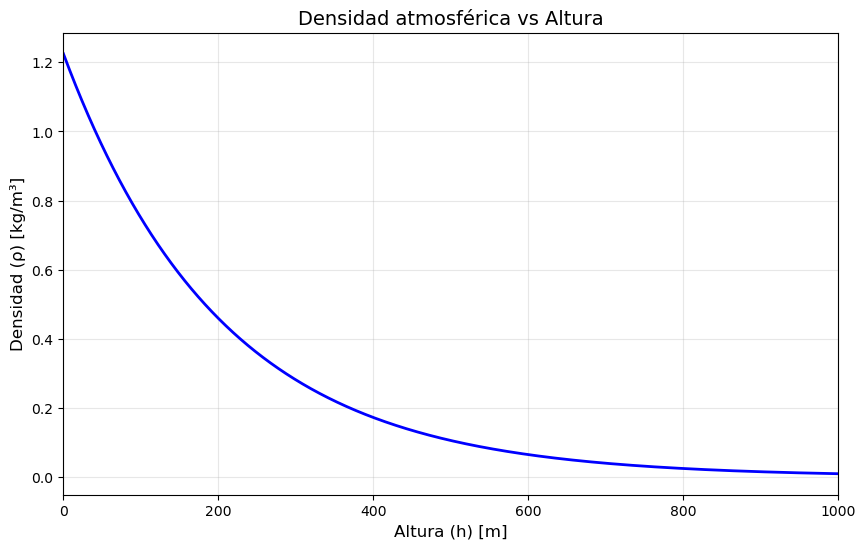

In [2]:
density(1000)

### Fuerzas y Flujos

Cuando una particula de polvo entra a la atmosfera, se mueve a velocidades muy altas, a esas velocidades el aire no se comporta como un fluido suave. Lo que pasara es que habra una colision constante con las moleculas de aire, que producira una resistencia al movimiento (fuerza de arrastre) y un calentamiento intenso (ablacion).

1. **Fuerza de arrastre**

$$F_D = \frac{1}{2} C_d \rho_{air} A v^2$$

* $C_d:$ Coeficiente de arrastre.
* $\rho_{air}:$ Densidad del aire a altura $h$.
* $A = \pi r^2:$ Area frontal de la particula.
* $v$ velocidad.



Por Segunda Ley de Newton la suma de todas las fuerzas que actuan sobre la particula es igual a su masa por aceleracion. Esto es,

$$\sum F = m \frac{dv}{dt}$$

Que fuerzas actuan?

La primera naturalmente es la gravedad, (va a favor del movimiento)

$$F_g = mg$$

Y la segunda, el arrastre del cual hablamos, (se opone al movimiento)

Asi,

$$m \frac{dv}{dt} = F_g - F_D$$

Luego, obtenemos la ecuacion de movimiento,

$$\frac{dv}{dt} = g - \frac{C_d \rho_{air}(h)A}{2m}v^2$$

2. Ablacion (perdida de masa)

Esta ecuacion resumira cuanta masa pierde la particula por erosion y vaporizacion mientras atraviesa el aire caliente. Sera proporcional al flujo de energia cinetica del aire ()

$$\frac{dm}{dt} = - \sigma A \rho_{air}(h) |v|^3$$

con $\sigma = \frac{C_h}{2Q}$ (coeficiente de ablacion), donde $C_h$ es la eficiencia de transferencia de calor del flujo al solido y $Q$ el calor de ablacion efectivo. $\sigma$ sera una constante empirica que condensa todos los procesos microscopicos como friccion, evaporacion, fragmentacion.



Note que $C_d$ y $\sigma$ concentran toda la fisica complejja de la interaccion gas-particula en constantes manejables.

3. Cinematica

$$\frac{dh}{dt} = -v$$

### Termodinamica

Para completar el modelo necesitamos un indicador de distribucion energetica con la cual podamos predecir el estado material del polvo cosmico al llegar al suelo. Hablemos de energia:

$$\frac{dE_{total}}{dt} = Q_{entra} - Q_{sale}$$

si el unico deposito de energia interna es el calor del material, entonces:

$$\frac{dE_{total}}{dt} = c_p m \frac{dT}{dt}$$

con $c_p$ el calor especifico del material.

- $Q_{entra}$

Cuando la particula cae debido al impacto del aire en la superficie el flujo de calor hacia la particula sera aproximadamente:

$$Q_{entra} = \frac{1}{2} c_h A \rho_{air}(h) |v|^3$$

pues recordemos que $c_h$ es el indicador de cuanta energia realmente se transmite a la superficie.

- $Q_{sale}$

Toda superficie caliente emite radiacion de acuerdo a la ley Stefan-Boltzmann:

$$Q_{sale} = \epsilon \sigma_{SB} (T^4 - T_{atmosfera}^4)$$

donde $\epsilon$ es la emisividad y $\sigma_{SB}$ la constante de Stefan-Boltzmann


Asi, la ecuacion completa queda

$$c_p m \frac{dT}{dt} = \frac{1}{2} c_h A \rho_{air}(h) |v|^3 - \epsilon \sigma_{SB} A (T^4 - T^4_{atmosfera})$$

Podemos concluir varios aspecttos a traves de este modelo:

* La particula se calienta rapidamente al entrar en capas mas densas, pues es directamente proporcional a $\rho$ y $v^3$.
* Si el calentamiento supera las perdidas radiativas T crece, y asi puede fundirse o vaporizarse.
* Si el arrastre reduce la velocidad o el aire es menos denso con respecto a la particula entonces T disminuye y el polvo sobrevive.
* Queremos determinar estos umbrales por una temperatura maxima alcanzada e identificar cada escenario.

### Variables y Parametros

Resumamos todo lo dicho entre lo que buscamos y lo que tenemos:

1. Variables

* $h(t):$ altura
* $v(t):$ velocidad
* $m(t):$ masa
* $T(t):$ temperatura

2. Parametros

* $g:$ gravedad (9.81 m/s)
* $\rho_0:$ densidad del aire a nivel del mar (1.225 kg/m^3)
* $H:$ altura de escala atmosferica (8000 m)
* $T_{atm}:$ temperatura atmosferica (240K)
* $\sigma_{SB}:$ Constante de Stefan-Boltzmann (5.67 x10^-8 W/m^2K^4)
* $c_d:$ coeficiente de arrastre (1)
* $\epsilon :$ emisividad (0.9)
* $\rho:$ densidad de la particula (3000 kg/m^3)
* $c_p:$ calor especifico (800 J/kgK)
* $c_h:$ coeficiente de transferencia de calor (0.1)
* $\sigma:$ coeficiente de abblacion efectiva (1x10^-8 s^2/m^2)
* $T_{fundido}:$ temperatura de fusion efectiva (1500K)
* $T_{vaporizacion}:$ temperatura de vaporizacion (3000K)


### Condiciones iniciales

- $h(0) = h_0$ (100km) final de la termosfera
- $v(0) = v_0$ (variable 10-70 km/s)
- $r(0) = r_0$ ($1 \mu m - 1mm$) de acuerdo al paper
- $T(0) = T_0$ (280K)




## Metodo Numerico y Simulaciones

In [3]:
import numpy as np
import math

g      = 9.81                 # m/s^2
rho0   = 1.225                # kg/m^3  (nivel del mar)
Hscale = 8000.0               # m       (altura de escala)
rho_p  = 3000.0               # kg/m^3  (grano rocoso típico)


Cd = 1.0      # arrastre (esfera ~0.47-1; aquí usamos 1 para robustez)
Ch = 0.025     # transferencia de calor efectiva

def mass_from_radius(r):
    return (4.0/3.0)*math.pi*rho_p*r**3

def area_from_radius(r):
    return math.pi*r**2

def rho_air(h):
    return rho0 * math.exp(-max(0.0, h)/Hscale)

H_melt = 1.5e6
H_vap  = 2.9e6
h_top = 100e3   #metros

In [4]:

def rhs_balistica(t, h, v, A0, m0):
    rho = rho_air(h)
    dhdt = -v
    dvdt = g - (Cd * rho * A0 / (2.0 * m0)) * v * abs(v)
    qdot = 0.5 * Ch * A0 * rho * abs(v)**3  # W = J/s
    return dhdt, dvdt, qdot

epsilon = 0.9
sigma_SB = 5.6704e-8
Tatm = 240.0     # K
T_melt = 1500.0  # K

def rk4_step_bal(t, h, v, A0, m0, dt):
    dh1, dv1, q1 = rhs_balistica(t,          h,              v,              A0, m0)
    dh2, dv2, q2 = rhs_balistica(t+0.5*dt,   h+0.5*dt*dh1,   v+0.5*dt*dv1,   A0, m0)
    dh3, dv3, q3 = rhs_balistica(t+0.5*dt,   h+0.5*dt*dh2,   v+0.5*dt*dv2,   A0, m0)
    dh4, dv4, q4 = rhs_balistica(t+dt,       h+dt*dh3,       v+dt*dv3,       A0, m0)
    h_next = h + (dt/6.0)*(dh1 + 2*dh2 + 2*dh3 + dh4)
    v_next = v + (dt/6.0)*(dv1 + 2*dv2 + 2*dv3 + dv4)
    qrad_ref = epsilon * sigma_SB * A0 * (T_melt**4 - Tatm**4)
    qconv_avg = (q1 + 2*q2 + 2*q3 + q4) / 6.0
    qnet_avg  = max(0.0, qconv_avg - qrad_ref)
    Qload_inc = qnet_avg * dt
    return h_next, v_next, Qload_inc

def simulate_case_A(r0, v0, dt=0.02, tmax=25000.0, h0=None):
    if h0 is None:
        h0 = h_top

    m0 = mass_from_radius(r0)
    A0 = area_from_radius(r0)

    t = 0.0
    h = float(h0)
    v = float(v0)
    Q_load = 0.0

    # guarda el primer estado
    reached_ground = False

    while t < tmax:
        # check suelo con interpolación lineal simple en el paso
        h_next, v_next, dQ = rk4_step_bal(t, h, v, A0, m0, dt)
        if h_next <= 0.0:
            # interpolar fracción del paso hasta h=0
            if h != h_next:
                theta = h / (h - h_next)  # in [0,1]
                theta = max(0.0, min(1.0, theta))
            else:
                theta = 1.0
            h = 0.0
            v = v + theta*(v_next - v)
            Q_load += dQ * theta
            t += dt * theta
            reached_ground = True
            break

        # aceptar paso completo
        h, v = h_next, v_next
        Q_load += dQ
        t += dt

    H_specific = Q_load / m0  # J/kg
    return {
        "reached_ground": reached_ground,
        "H_specific": H_specific,
        "Q_load": Q_load,
        "h_final": h,
        "v_final": v,
        "m0": m0,
        "A0": A0,
        "t": t
    }

In [5]:
def classify_by_H_r(H_specific, r0, H_melt=H_melt, H_vap=H_vap, r_ref=100e-6, beta=0.8):
    """
    Clasifica por carga térmica específica con umbrales escalados por tamaño.
    H_melt(r) = H_melt * (r0/r_ref)^beta
    H_vap(r)  = H_vap  * (r0/r_ref)^beta
    """
    factor = (r0 / r_ref)**beta
    Hm = H_melt * factor
    Hv = H_vap  * factor

    if H_specific >= Hv:
        return "vaporized"
    if H_specific >= Hm:
        return "melted"
    return "intact"

def run_case_A_r(r0, v0, dt=0.02, tmax=25000.0, h0=None,
                 Hm=H_melt, Hv=H_vap, r_ref=100e-6, beta=0.95, verbose=True):
    res = simulate_case_A(r0, v0, dt=dt, tmax=tmax, h0=h0)
    state = classify_by_H_r(res["H_specific"], r0, Hm, Hv, r_ref=r_ref, beta=beta)
    if verbose:
        print(f"r0 = {r0*1e6:.1f} µm | v0 = {v0/1000:.1f} km/s | h0 = {(h0 if h0 else h_top)/1000:.0f} km")
        print(f"Estado final (Opción A, r-scaled): {state}")
        print(f"Reached ground: {res['reached_ground']}")
        print(f"H = {res['H_specific']:.3e} J/kg  |  Q_load = {res['Q_load']:.3e} J")
        print(f"t_end = {res['t']:.1f} s  |  v_final = {res['v_final']:.1f} m/s")
    return res, state

In [6]:
# 1) Intact esperado (1mm a 11 km/s)
res, state = run_case_A_r(1.0e-3, 11000.0)

r0 = 1000.0 µm | v0 = 11.0 km/s | h0 = 100 km
Estado final (Opción A, r-scaled): intact
Reached ground: True
H = 1.094e+06 J/kg  |  Q_load = 1.375e+01 J
t_end = 1890.1 s  |  v_final = 8.0 m/s


In [7]:
# 2) Melted esperado (50 µm a ~15 km/s). Ajusta v0 +/-2 km/s si cae en frontera.
res, state = run_case_A_r(50e-6, 17000.0)

r0 = 50.0 µm | v0 = 17.0 km/s | h0 = 100 km
Estado final (Opción A, r-scaled): melted
Reached ground: True
H = 1.045e+06 J/kg  |  Q_load = 1.642e-03 J
t_end = 8819.2 s  |  v_final = 1.8 m/s


In [8]:
# 3) Vaporized esperado (30–40 µm a ~19.5–20 km/s)
res, state = run_case_A_r(30e-6, 19500.0)

r0 = 30.0 µm | v0 = 19.5 km/s | h0 = 100 km
Estado final (Opción A, r-scaled): vaporized
Reached ground: True
H = 1.591e+06 J/kg  |  Q_load = 5.398e-04 J
t_end = 11417.2 s  |  v_final = 1.4 m/s


In [9]:
def sweep_regimes_rscaled(r_um_list, v_kms_list, h0=None, dt=0.02, tmax=25000.0,
                          Hm_ref=H_melt, Hv_ref=H_vap, r_ref=100e-6, beta=0.95):

    states = []
    for r_um in r_um_list:
        row = []
        for v_kms in v_kms_list:
            r0 = float(r_um)*1e-6
            v0 = float(v_kms)*1e3
            res = simulate_case_A(r0, v0, dt=dt, tmax=tmax, h0=h0)
            state = classify_by_H_r(res["H_specific"], r0, Hm_ref, Hv_ref, r_ref=r_ref, beta=beta)
            row.append(state)
        states.append(row)
    return states

r_grid_um = [30, 40, 50, 80, 100, 200, 500, 1000]   # µm (0.03–1.0 mm)
v_grid_kms = [11, 12, 13, 14, 15, 16, 18, 19.5, 20] # km/s
states = sweep_regimes_rscaled(r_grid_um, v_grid_kms, h0=None, beta=0.95)

# Imprimimos tablasa
print("      ", *(f"{v:>6.1f}" for v in v_grid_kms))
for r_um, row in zip(r_grid_um, states):
    print(f"{r_um:>5.0f}µm", *(f"{s[:3]:>6}" for s in row))  # Int/Mel/Vap recortado

         11.0   12.0   13.0   14.0   15.0   16.0   18.0   19.5   20.0
   30µm    int    int    int    int    int    int    mel    vap    vap
   40µm    int    int    int    int    int    int    vap    vap    vap
   50µm    int    int    int    int    int    int    vap    vap    vap
   80µm    int    int    int    int    int    int    mel    vap    vap
  100µm    int    int    int    int    int    int    mel    vap    vap
  200µm    int    int    int    int    int    int    mel    mel    mel
  500µm    int    int    int    int    int    int    int    int    int
 1000µm    int    int    int    int    int    int    int    int    int


In [10]:
def simulate_traj_A(r0, v0, dt=0.02, tmax=25000.0, h0=None):
    """
    Igual a simulate_case_A pero además guarda series para graficar.
    Devuelve: t, h, v, Hspec, qconv, qnet, reached_ground, H_specific, Q_load
    """
    if h0 is None:
        h0 = h_top

    m0 = mass_from_radius(r0)
    A0 = area_from_radius(r0)

    t = 0.0
    h = float(h0)
    v = float(v0)
    Q_load = 0.0

    # series
    ts, hs, vs = [], [], []
    Hspec_list, qconv_list, qnet_list = [], [], []

    reached_ground = False

    while t < tmax:
        # registrar estado y flujos al inicio del paso
        rho = rho_air(h)
        qconv = 0.5 * Ch * A0 * rho * abs(v)**3
        qrad_ref = epsilon * sigma_SB * A0 * (T_melt**4 - Tatm**4)
        qnet  = max(0.0, qconv - qrad_ref)

        ts.append(t); hs.append(h); vs.append(v)
        Hspec_list.append(Q_load / m0 if m0 > 0 else 0.0)
        qconv_list.append(qconv); qnet_list.append(qnet)

        # avanzar un paso RK4 (tu rutina)
        h_next, v_next, dQ = rk4_step_bal(t, h, v, A0, m0, dt)

        # evento suelo dentro del paso
        if h_next <= 0.0:
            theta = h / (h - h_next) if h != h_next else 1.0
            theta = max(0.0, min(1.0, theta))
            h = 0.0
            v = v + theta*(v_next - v)
            Q_load += dQ * theta
            t += dt * theta
            reached_ground = True
            break

        # aceptar paso
        h, v = h_next, v_next
        Q_load += dQ
        t += dt

    # último muestreo
    ts.append(t); hs.append(h); vs.append(v)
    rho = rho_air(h)
    qconv = 0.5 * Ch * A0 * rho * abs(v)**3
    qrad_ref = epsilon * sigma_SB * A0 * (T_melt**4 - Tatm**4)
    qnet  = max(0.0, qconv - qrad_ref)
    Hspec_list.append(Q_load / m0 if m0 > 0 else 0.0)
    qconv_list.append(qconv); qnet_list.append(qnet)

    return {
        "t": np.array(ts),
        "h": np.array(hs),
        "v": np.array(vs),
        "Hspec": np.array(Hspec_list),
        "qconv": np.array(qconv_list),
        "qnet": np.array(qnet_list),
        "reached_ground": reached_ground,
        "Q_load": Q_load,
        "H_specific": Q_load / m0,
        "r0": r0, "v0": v0
    }

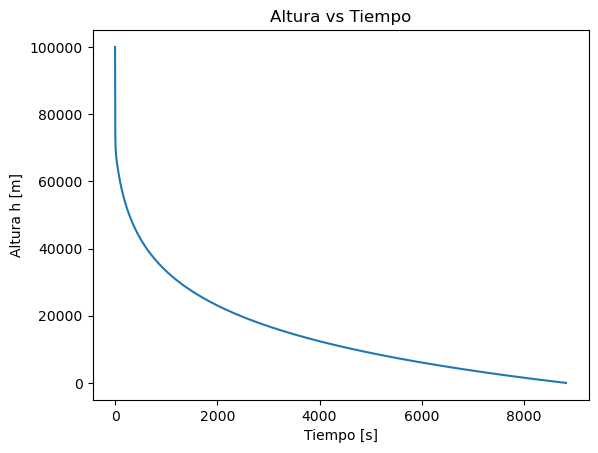

In [11]:
r0_demo = 50e-6   # 50 µm
v0_demo = 14e3    # 14 km/s
traj = simulate_traj_A(r0_demo, v0_demo, dt=0.02, tmax=20000)

plt.figure(); plt.plot(traj["t"], traj["h"])
plt.xlabel("Tiempo [s]"); plt.ylabel("Altura h [m]"); plt.title("Altura vs Tiempo")
plt.show()

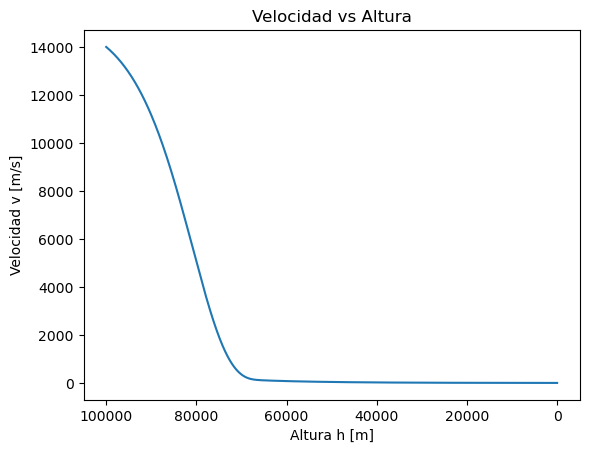

In [12]:
plt.figure(); plt.plot(traj["h"], traj["v"])
plt.xlabel("Altura h [m]"); plt.ylabel("Velocidad v [m/s]"); plt.title("Velocidad vs Altura")
plt.gca().invert_xaxis(); plt.show()

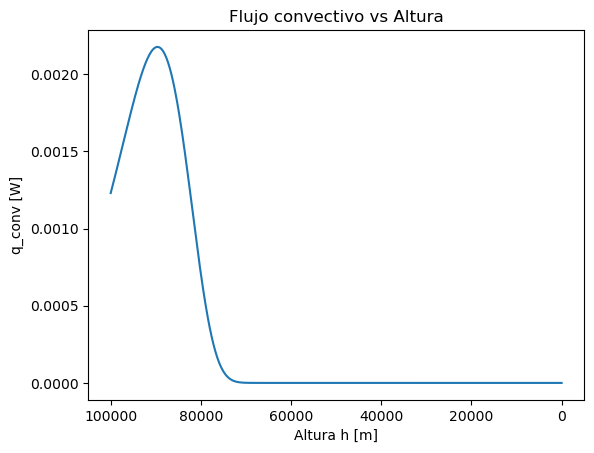

In [13]:
plt.figure(); plt.plot(traj["h"], traj["qconv"])
plt.xlabel("Altura h [m]"); plt.ylabel("q_conv [W]"); plt.title("Flujo convectivo vs Altura")
plt.gca().invert_xaxis(); plt.show()

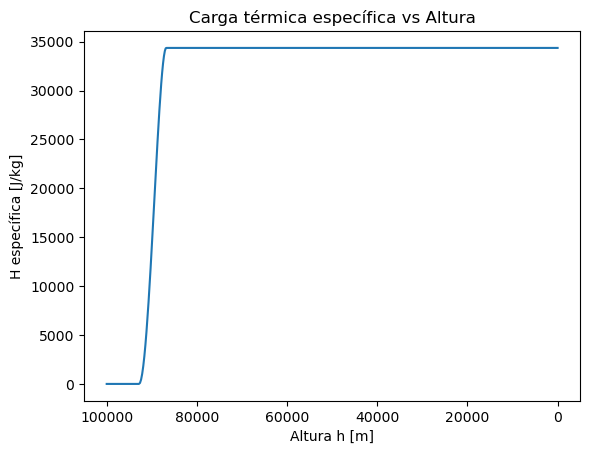

In [14]:
plt.figure(); plt.plot(traj["h"], traj["Hspec"])
plt.xlabel("Altura h [m]"); plt.ylabel("H específica [J/kg]"); plt.title("Carga térmica específica vs Altura")
plt.gca().invert_xaxis(); plt.show()

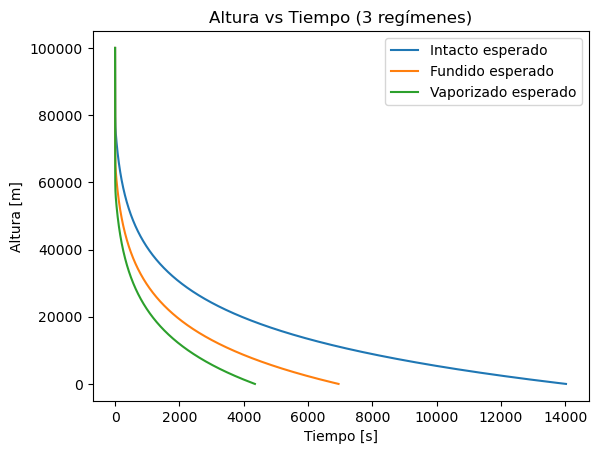

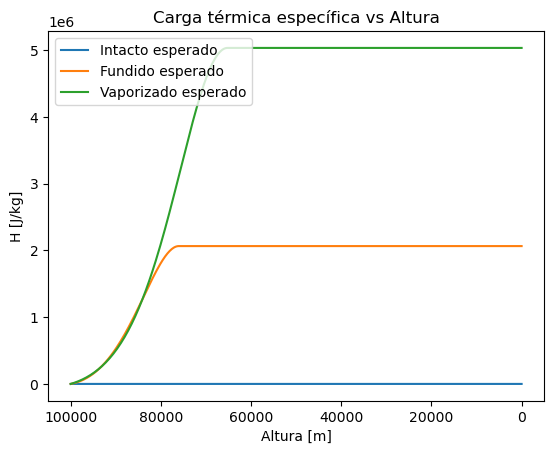

In [15]:
cases = [
    (20e-6, 12e3, "Intacto esperado"),    # pequeño y más lento
    (80e-6, 18e3, "Fundido esperado"),    # mediano / más rápido
    (200e-6, 22e3, "Vaporizado esperado") # grande / rápido
]

trajs = [simulate_traj_A(r, v, dt=0.02, tmax=20000) for r, v, _ in cases]

# h(t)
plt.figure()
for tr, (_, _, label) in zip(trajs, cases):
    plt.plot(tr["t"], tr["h"], label=label)
plt.xlabel("Tiempo [s]"); plt.ylabel("Altura [m]"); plt.title("Altura vs Tiempo (3 regímenes)")
plt.legend(); plt.show()

# H(h)
plt.figure()
for tr, (_, _, label) in zip(trajs, cases):
    plt.plot(tr["h"], tr["Hspec"], label=label)
plt.xlabel("Altura [m]"); plt.ylabel("H [J/kg]"); plt.title("Carga térmica específica vs Altura")
plt.gca().invert_xaxis(); plt.legend(); plt.show()

## Problema Inverso Simulacion

In [16]:
import numpy as np

# Malla
r_um = np.linspace(10, 300, 20)     # µm
v_kms = np.linspace(10, 25, 20)     # km/s
J = len(r_um)*len(v_kms)

# Bins observados en superficie
r_obs_um = r_um.copy()
I = len(r_obs_um)

# Matriz
K = np.zeros((I, J))
col = 0
for j_r, ru in enumerate(r_um):
    for j_v, vk in enumerate(v_kms):
        r0 = ru*1e-6; v0 = vk*1e3
        res = simulate_case_A(r0, v0, dt=0.03, tmax=20000.0)
        state = classify_by_H_r(res["H_specific"], r0)
        # Probabilidad de "aparecer" en bin i (aquí 1 si sobrevive en su mismo r-bin; 0 si no)
        if res["reached_ground"] and state in ("intact","melted"):
            i = j_r   # mismo bin de r
            K[i, col] = 1.0
        # estadp
        col += 1

# g sintetico
g = np.zeros(I)
# EJEMPLO: pico a ~60–80 µm
g[(r_obs_um>=60)&(r_obs_um<=80)] = 1.0
g = g / g.sum()

In [17]:
# Tikhonov: min ||K f - g||^2 + λ||f||^2 s.a. f>=0
λ = 1e-2
f = np.ones(J) / J
KtK = K.T @ K + λ*np.eye(J)
Ktg = K.T @ g

# Gradiente descendente proyectado
α = 1e-1 / (np.linalg.norm(KtK, 2)+1e-9)  # paso
for _ in range(2000):
    grad = KtK @ f - Ktg
    f = f - α*grad
    f = np.maximum(0.0, f)    # proyección a f≥0
    s = f.sum()
    if s>0: f = f/s

# f_j reconstruye distribución en (r_0,v_0)
F = f.reshape(len(r_um), len(v_kms))

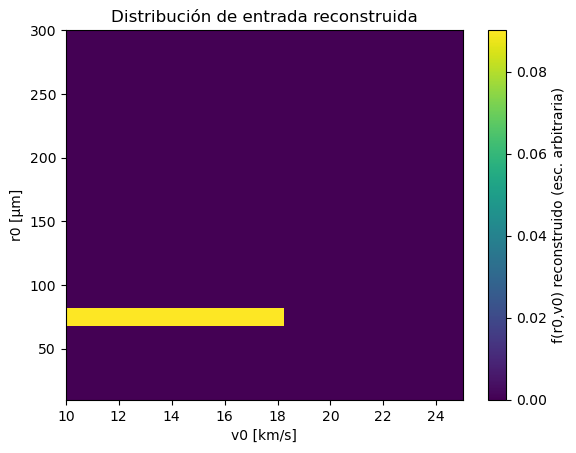

Residual ||Kf-g||: 0.008424675226663347


In [18]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(F, origin='lower', aspect='auto',
           extent=[v_kms[0], v_kms[-1], r_um[0], r_um[-1]])
plt.colorbar(label='f(r0,v0) reconstruido (esc. arbitraria)')
plt.xlabel('v0 [km/s]'); plt.ylabel('r0 [µm]')
plt.title('Distribución de entrada reconstruida')
plt.show()

resid = np.linalg.norm(K@f - g)
print("Residual ||Kf-g||:", resid)

__Metropolis-Hastings__

La idea es encontrar dos parametros: $r$ y $v$. En vez de encontrar parametros puntuales, podemos encontrar las distribuciones de dichos parametros usando algoritmos como Metropolis–Hastings, sabemos la distribución de las particulas que llegan a la tierra $g$ y queremos la distribución de particulas original. Esto lo haremos con el algoritmo Metropolis-Hastings, MCMC: https://en.wikipedia.org/wiki/Metropolis–Hastings_algorithm



In [ ]:
def softmax(u):
    """Transforma u en el simplex: f = softmax(u) con suma 1 y f_j>0.
    u : vector real de tamaño J
    devuelve f de tamaño J"""
    e = np.exp(u - np.max(u))
    return e / e.sum()


def log_posterior_u(u, K, g, sigma, lambda_reg):
    """Calcula el log-posterior (hasta constante) del vector no restringido u.

    - f = softmax(u)
    - verosimilitud gaussiana en g: p(g|f) ∝ exp(-||Kf-g||^2/(2σ^2))
    - prior Tikhonov: p(f) ∝ exp(-λ||f||^2/2)

    Devuelve log_like + log_prior."""
    f = softmax(u)
    resid = K @ f - g
    log_like = -0.5 * np.dot(resid, resid) / (sigma**2)
    log_prior = -0.5 * lambda_reg * np.dot(f, f)
    return log_like + log_prior


def mcmc_reconstruct(K, g, sigma=1e-2, lambda_reg=1e-2,
                     n_iter=20000, step_std=0.5, burn_in=5000, thin=10,
                     random_seed=0):
    """Ejecuta Metropolis–Hastings en el espacio unconstrained u (f = softmax(u)).

    Parámetros:
    - K: matriz I x J
    - g: vector observado de tamaño I
    - sigma: desviación típica del ruido en g
    - lambda_reg: fuerza del prior Tikhonov sobre f
    - n_iter: número total de iteraciones
    - step_std: sigma de la propuesta gaussiana en u
    - burn_in: iteraciones descartadas iniciales
    - thin: conservar 1 muestra cada `thin` iteraciones

    Retorna un diccionario con:
    - samples: (N_samples, J) muestras de f (en el simplex)
    - posterior_mean: media empírica de las muestras (J,)
    - posterior_std: desviación típica por componente (J,)
    - accept_rate: tasa de aceptación global
    - residuals: array de ||K f - g|| para cada muestra guardada
    """
    rng = np.random.default_rng(random_seed)
    I, J = K.shape

    # u con ceros
    u = np.zeros(J)
    current_lp = log_posterior_u(u, K, g, sigma, lambda_reg)

    samples = []
    accepts = 0
    total = 0
    residuals = []

    for it in range(n_iter):
        # Paseo aleatorio gaussiano en u
        proposal = u + rng.normal(scale=step_std, size=J)
        prop_lp = log_posterior_u(proposal, K, g, sigma, lambda_reg)
        log_alpha = prop_lp - current_lp
        if np.log(rng.random()) < log_alpha:
            u = proposal
            current_lp = prop_lp
            accepts += 1
        total += 1

        # Burn-in
        if it >= burn_in and ((it - burn_in) % thin == 0):
            f_sample = softmax(u)
            samples.append(f_sample.copy())
            residuals.append(np.linalg.norm(K @ f_sample - g))

    samples = np.array(samples)
    posterior_mean = samples.mean(axis=0)
    posterior_std = samples.std(axis=0)
    accept_rate = accepts / total

    return {
        "samples": samples,
        "posterior_mean": posterior_mean,
        "posterior_std": posterior_std,
        "accept_rate": accept_rate,
        "residuals": np.array(residuals)
    }


def demo_run():
    """Construye K, g sintéticos y ejecuta mcmc_reconstruct.
    Esta función **no** muestra gráficos; devuelve (results, K, g_noisy, f_true, r_um, v_kms).
    """
    r_um = np.linspace(10, 300, 20)     # µm
    v_kms = np.linspace(10, 25, 20)     # km/s
    J = len(r_um)*len(v_kms)
    r_obs_um = r_um.copy()
    I = len(r_obs_um)

    # Construyo K:
    K = np.zeros((I, J))
    col = 0
    for j_r in range(len(r_um)):
        for j_v in range(len(v_kms)):
            i = j_r
            K[i, col] = 1.0
            col += 1

    # f_true:
    f_true = np.zeros(J)
    mask_r = (r_um >= 60) & (r_um <= 80)
    for j_r, in_mask in enumerate(mask_r):
        for j_v in range(len(v_kms)):
            idx = j_r * len(v_kms) + j_v
            if in_mask:
                f_true[idx] = 1.0
    f_true = f_true / f_true.sum()

    # g
    g = K @ f_true
    sigma_noise = 0.01
    rng = np.random.default_rng(1)
    g_noisy = g + rng.normal(scale=sigma_noise, size=g.shape)
    g_noisy = np.clip(g_noisy, 0, None)
    if g_noisy.sum() > 0:
        g_noisy = g_noisy / g_noisy.sum()

    # MCMC
    out = mcmc_reconstruct(K, g_noisy, sigma=sigma_noise, lambda_reg=1e-2,
                          n_iter=12000, step_std=0.8, burn_in=2000, thin=5, random_seed=42)

    return out, K, g_noisy, f_true, r_um, v_kms


def plot_posterior_mean_heatmap(results, r_um, v_kms):
    """Heatmap de la media posterior en la malla (r0,v0)."""
    F_mean = results["posterior_mean"].reshape(len(r_um), len(v_kms))
    plt.figure(figsize=(7,4))
    plt.imshow(F_mean, origin='lower', aspect='auto',
               extent=[v_kms[0], v_kms[-1], r_um[0], r_um[-1]])
    plt.colorbar(label='f media posterior (escala arbitraria)')
    plt.xlabel('v0 [km/s]'); plt.ylabel('r0 [µm]')
    plt.title('Media posterior f(r0,v0)')
    plt.show()

def plot_marginals_with_credible(results, K, f_true, r_um, v_kms):
    """Grafica solo la marginal en r y en v a partir de la media posterior (sin banda ni g_real)."""

    samples = results["samples"] 
    Nsamples = samples.shape[0]
    F_samples = samples.reshape(Nsamples, len(r_um), len(v_kms))

    # Marginal en r 
    f_r_samples = F_samples.sum(axis=2)  # (Nsamples, Nr)
    mean_r = f_r_samples.mean(axis=0)

    # Marginal en v 
    f_mean = results["posterior_mean"].reshape(len(r_um), len(v_kms))
    f_v_mean = f_mean.sum(axis=0)

    # Marginal en r
    plt.figure()
    plt.plot(r_um, mean_r, label='Media posterior (marginal en r)')
    plt.xlabel('r [µm]')
    plt.ylabel('Probabilidad marginal en r')
    plt.legend()
    plt.title('Marginal en r (solo media posterior)')
    plt.show()

    # Marginal en v 
    plt.figure()
    plt.plot(v_kms, f_v_mean, label='Media posterior (marginal en v)')
    plt.xlabel('v [km/s]')
    plt.ylabel('Probabilidad marginal en v')
    plt.legend()
    plt.title('Marginal en v (solo media posterior)')
    plt.show()




def plot_residuals_trace(results):
    """Traza de los residuals ||K f - g|| a lo largo de las muestras guardadas,
    con una caja que indica la máxima variación."""
    residuals = np.array(results["residuals"])
    max_var = residuals.max() - residuals.min()

    plt.figure()
    plt.plot(residuals, label='Residuals')
    plt.axhline(np.mean(residuals), color="red", linewidth=2, linestyle="dashed", label='Media')
    plt.xlabel('Índice de muestra')
    plt.ylabel('||K f - g||')
    plt.title('Residuals a lo largo de las muestras posterior')

    textstr = f'Máxima variación: {max_var:.3f} \nMedia: {np.mean(residuals):.3f}'
    plt.gca().text(
        0.02, 0.95, textstr,
        transform=plt.gca().transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )

    plt.legend()
    plt.show()


Ejecutando MCMC...


ValueError: Initial state has a large condition number. Make sure that your walkers are linearly independent for the best performance

In [ ]:
results, K, g_noisy, f_true, r_um, v_kms = demo_run()
plot_posterior_mean_heatmap(results, r_um, v_kms)
plot_marginals_with_credible(results, K, f_true, r_um, v_kms)
plot_residuals_trace(results)

__Algoritmo MCMC__

A continuación se explica el método de reconstrucción mediante MCMC (Metropolis-Hastings) aplicado

__Contexto general__
Queremos reconstruir una distribución desconocida $f(r_0, v_0)$ a partir de mediciones indirectas $g$, sabiendo que están relacionadas por una matriz $K$:

$$ g \approx K f $$

El problema es mal condicionado: muchas distribuciones $ f$  diferentes pueden producir observaciones $g$ muy parecidas. Por ello, en lugar de buscar una única solución puntual, se usa MCMC (Markov Chain Monte Carlo) para explorar todas las posibles $f$ compatibles con los datos y obtener su distribución posterior.

---

__Estructura general del algoritmo__

El método implementado usa el algoritmo Metropolis-Hastings dentro de un espacio transformado:

1. Espacio de parámetros:
   - El vector $f$ debe cumplir que $f_i > 0$ y $\sum_i f_i = 1$ al ser una distribución discreta.
   - Para evitar estas restricciones, se introduce un vector $ u \in \mathbb{R}^J $ sin restricciones y se define:

     $$f = \text{softmax}(u) = \frac{e^{u_i}}{\sum_j e^{u_j}} $$

     Así se garantiza que $f$ siempre es positivo y normalizado.

2. Posterior a estimar:**
   Según el modelo bayesiano:

   $$p(f|g) \propto p(g|f) \times p(f)$$

   donde:
   - **Verosimilitud:**

     $$ p(g|f) \propto \exp\left(-\frac{\|K f - g\|^2}{2 \sigma^2}\right) $$

   - **Prior:**

     $$p(f) \propto \exp\left(-\frac{\lambda}{2} \|f\|^2\right)$$

   Así, el log-posterior en función de $ u $ es:

   $$\log p(u|g) = -\frac{1}{2\sigma^2}\|K f(u) - g\|^2 - \frac{\lambda}{2}\|f(u)\|^2 $$

---

__Implementación paso a paso en el código__

__softmax(u)__

Convierte el vector $u$ en una probabilidad discreta $ f $:
```python
def softmax(u):
    e = np.exp(u - np.max(u))
    return e / e.sum()
```
El desplazamiento por `np.max(u)` evita desbordamientos numéricos.

---

__log_posterior_u(u, K, g, sigma, lambda_reg)__

Se evalua el logaritmo de la densidad posterior para un estado dado $u$:
```python
def log_posterior_u(u, K, g, sigma, lambda_reg):
    f = softmax(u)
    resid = K @ f - g
    log_like = -0.5 * np.dot(resid, resid) / (sigma**2)
    log_prior = -0.5 * lambda_reg * np.dot(f, f)
    return log_like + log_prior
```
- Calcula la discrepancia entre $K f$ y $ g $.
- Añade la regularización.
- Devuelve el valor del logaritmo de la densidad posterior.

---

__mcmc_reconstruct__
Ejecuta el algoritmo Metropolis-Hastings:

```python
def mcmc_reconstruct(K, g, sigma=1e-2, lambda_reg=1e-2, n_iter=20000, step_std=0.5, burn_in=5000, thin=10, random_seed=0):
```

__Etapas principales:__

1. Inicialización:
   ```python
   u = np.zeros(J)
   current_lp = log_posterior_u(u, K, g, sigma, lambda_reg)
   ```
   Se parte de una distribución uniforme $ f = 1/J $.

2. Bucle MCMC:
   Para cada iteración:
   - Se propone un nuevo $ u' = u + \varepsilon $, con $ \varepsilon \sim N(0, \text{step\_std}^2) $
   - Se calcula $ \log p(u'|g) $
   - Se acepta con probabilidad:

    $$ \alpha = \min\left(1, e^{\log p(u') - \log p(u)}\right) $$

   ```python
   proposal = u + rng.normal(scale=step_std, size=J)
   prop_lp = log_posterior_u(proposal, K, g, sigma, lambda_reg)
   log_alpha = prop_lp - current_lp
   if np.log(rng.random()) < log_alpha:
       u = proposal
       current_lp = prop_lp
       accepts += 1
   ```

3. __Recolección de muestras:__

   Después del burn-in, se guarda una muestra cada thin pasos:
   ```python
   if it >= burn_in and ((it - burn_in) % thin == 0):
       f_sample = softmax(u)
       samples.append(f_sample.copy())
       residuals.append(np.linalg.norm(K @ f_sample - g))
   ```

---

__Resultados__
Obtenemos:
- Error a lo largo de la cadena MCMC.
- Distribución marginal posterior en $r_0$ y $ v_0 $.
- Mapa de calor de la media posterior $ f(r_0, v_0) $.

Así podemos ver si:

- Si la cadena converge si el el residual se estabiliza (como es el caso, el promedio es $0029$ y la maxima variación es $0.031$.).
- Qué regiones del espacio $(r_0, v_0)$ tienen mayor probabilidad posterior.
